In [46]:
import pandas as pd
import matplotlib.pyplot as plt

<div style='font-size:110%;'>
    <a id='Title'></a>
    <h1 style='color: skyblue; font-weight: bold; font-family: Cascadia code; border-color: skyblue;'>
        <center style='margin: .1em; padding-top:.6em'>Загрузка данных</center>
    </h1>
</div>

<h1 align="center" ><a id='cloud'><b>Word cloud ☁ <b></a></h1>

In [47]:
df = pd.read_excel('Downloads/Аналитик_РБК_тестовое задание.xlsx', 
                   sheet_name = 'Исходные данные',
                   parse_dates = [0])

<div style='font-size:110%;'>
    <a id='Title'></a>
    <h1 style='color: White; font-weight: bold; font-family: Cascadia code; background-color: skyblue; border-radius: .4em'>
        <center style='margin: .1em; padding-top:.6em'>Показать понедельную динамику посещаемости сайта за сентябрь-ноябрь 2016. </center>
    </h1>
</div>
<div style='margin-top: 1em'>Показатели:</div>
<ul>
    <li>визиты</li>
    <li>просмотры</li>
    <li>среднедневное кол-во визитов на посетителя</li>
</ul>    

In [56]:
mask = (df['Интервал дат визита'].dt.year == 2016) & \
       (df['Интервал дат визита'].dt.month >= 9) & \
       (df['Интервал дат визита'].dt.month <= 11)
df['week'] = df['Интервал дат визита'].dt.isocalendar().week 
df_dinam = df[mask]

In [103]:
df_visits = df_dinam[['week','Визиты']].groupby('week').sum('Визиты')
df_views = df_dinam[['week','Просмотры']].groupby('week').sum('Просмотры')
df_poset = df_dinam[['week','Посетители']].groupby('week').sum('Посетители')
df_dinam['mean_day'] = df_dinam['Визиты']/df_dinam['Посетители']
df_mean = df_dinam[['week','mean_day']].groupby('week').mean('mean_day')

C:\Users\voval\AppData\Local\Temp\ipykernel_9484\3954197751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dinam['mean_day'] = df_dinam['Визиты']/df_dinam['Посетители']


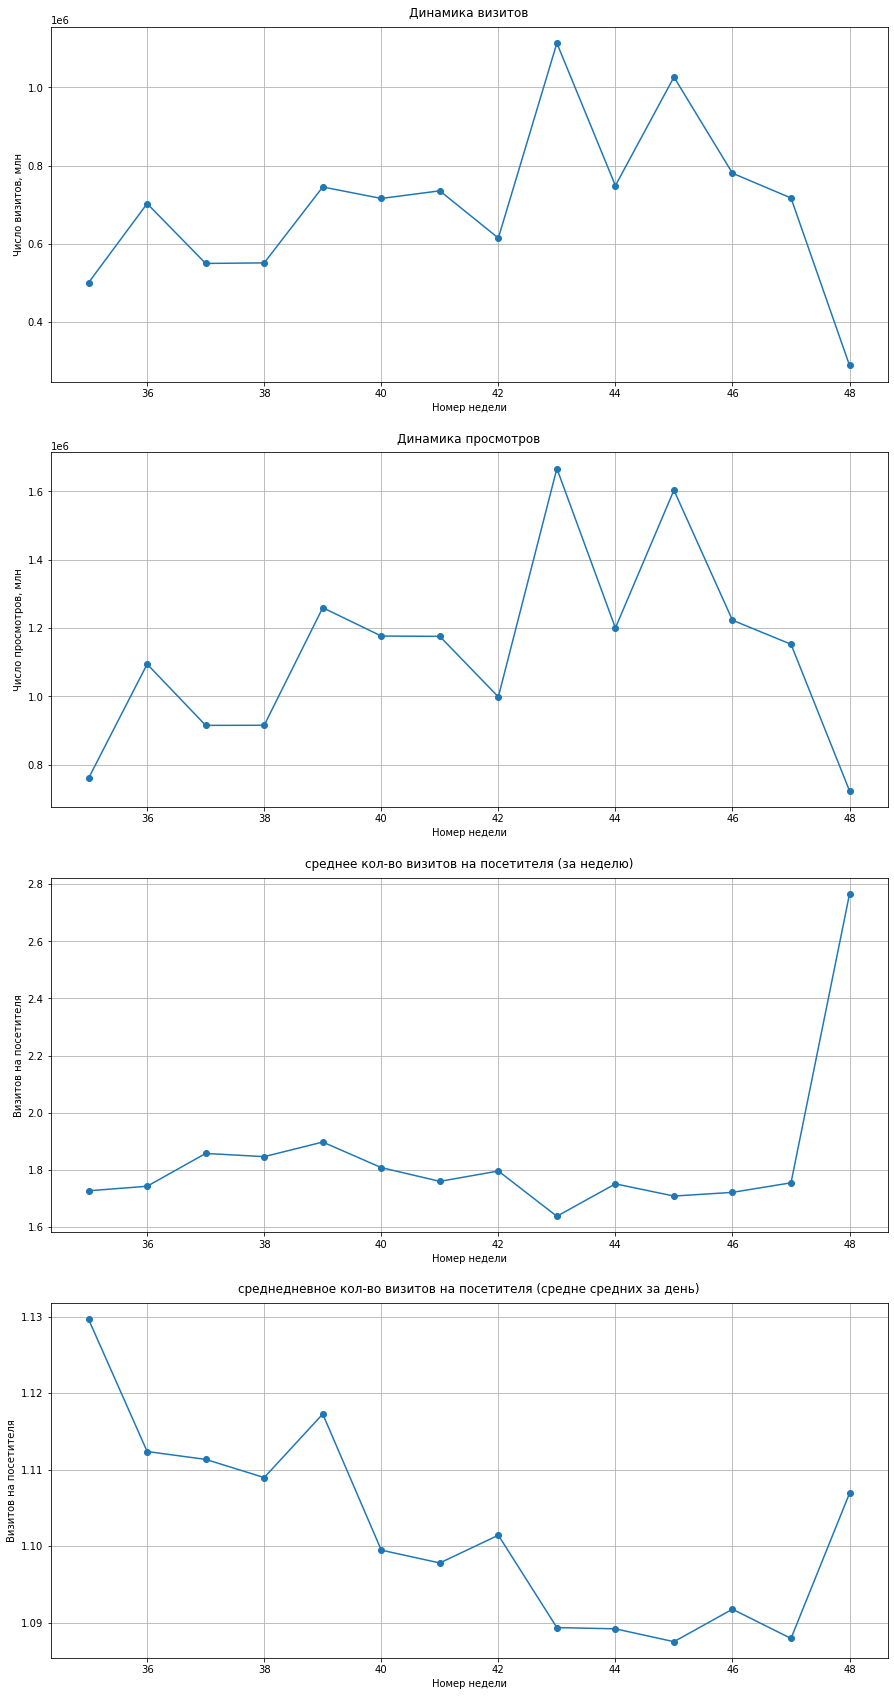

In [111]:
fig, axes = plt.subplots(4, 1)
axes[0].plot(list(df_visits.index),df_visits['Визиты'] , 'o-')
axes[0].set_ylabel('Число визитов, млн')
axes[0].set_xlabel('Номер недели')
axes[0].grid(True)
axes[0].set_title('Динамика визитов',
                loc = 'center',    
                pad = 10)
axes[1].plot(list(df_views.index),df_views['Просмотры'], 'o-')
axes[1].set_ylabel('Число просмотров, млн')
axes[1].set_xlabel('Номер недели')
axes[1].set_title('Динамика просмотров',
                loc = 'center',    
                pad = 10)
axes[1].grid(True)
axes[2].plot(list(df_poset.index),df_views['Просмотры']/df_poset['Посетители'], 'o-' )
axes[2].set_ylabel('Визитов на посетителя')
axes[2].set_xlabel('Номер недели')
axes[2].grid(True)
axes[2].set_title('среднее кол-во визитов на посетителя (за неделю)',
                loc = 'center',    
                pad = 10)

axes[3].plot(list(df_poset.index),df_mean['mean_day'], 'o-' )
axes[3].set_ylabel('Визитов на посетителя')
axes[3].set_xlabel('Номер недели')
axes[3].grid(True)
axes[3].set_title('среднедневное кол-во визитов на посетителя (средне средних за день)',
                loc = 'center',    
                pad = 10)


fig.set_figheight(30)
fig.set_figwidth(15)
plt.show()

<div style='font-size:110%;'>
    <a id='Title'></a>
    <h1 style='color: White; font-weight: bold; font-family: Cascadia code; background-color: skyblue; border-radius: .4em'>
        <center style='margin: .1em; padding-top:.6em'>Рассчитать по каждой отчётной неделе (пн-вс) изменение за неделю и за год (неделя 2016 г. к той же неделе 2015 г.)</center>
    </h1>
</div>


In [115]:
mask_1 = (df['Интервал дат визита'].dt.year == 2016)
mask_2 = (df['Интервал дат визита'].dt.year == 2015)
df_2015 = df[mask_1].groupby('week').sum()
df_2016 = df[mask_2].groupby('week').sum()

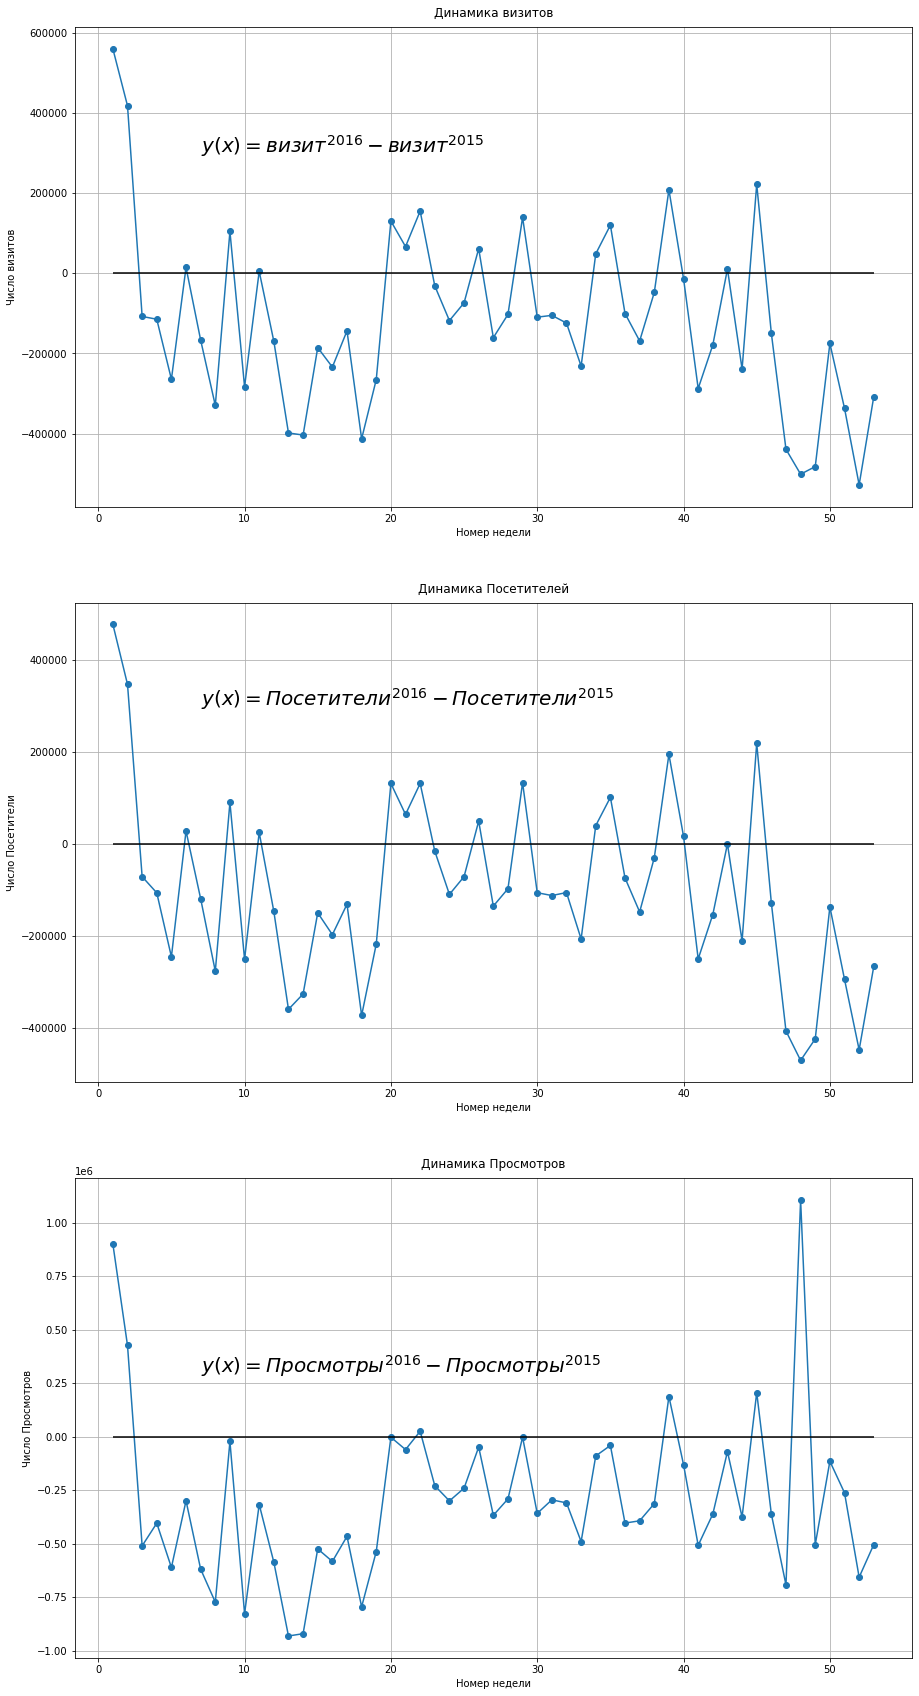

In [142]:
fig, axes = plt.subplots(3, 1)
axes[0].plot(list(df_2015.index),(df_2015 - df_2016)['Визиты'] , 'o-')
axes[0].set_ylabel('Число визитов')
axes[0].set_xlabel('Номер недели')
axes[0].grid(True)
axes[0].set_title('Динамика визитов',
                loc = 'center',    
                pad = 10)
axes[0].hlines(0, 1, 53, color = 'black')
axes[0].text(7,300000,"$y(x)=визит^{2016} - визит^{2015}$",fontsize = 20)

axes[1].plot(list(df_2015.index),(df_2015 - df_2016)['Посетители'] , 'o-')
axes[1].set_ylabel('Число Посетители')
axes[1].set_xlabel('Номер недели')
axes[1].grid(True)
axes[1].set_title('Динамика Посетителей',
                loc = 'center',    
                pad = 10)
axes[1].hlines(0, 1, 53, color = 'black')
axes[1].text(7,300000,"$y(x)=Посетители^{2016} - Посетители^{2015}$",fontsize = 20)

axes[2].plot(list(df_2015.index),(df_2015 - df_2016)['Просмотры'] , 'o-')
axes[2].set_ylabel('Число Просмотров')
axes[2].set_xlabel('Номер недели')
axes[2].grid(True)
axes[2].set_title('Динамика Просмотров',
                loc = 'center',    
                pad = 10)
axes[2].hlines(0, 1, 53, color = 'black')
axes[2].text(7,300000,"$y(x)=Просмотры^{2016} - Просмотры^{2015}$",fontsize = 20)

fig.set_figheight(30)
fig.set_figwidth(15)
plt.show()

<div style='font-size:110%;'>
    <a id='Title'></a>
    <h1 style='color: White; font-weight: bold; font-family: Cascadia code; background-color: skyblue; border-radius: .4em'>
        <center style='padding:.2em'>Построить помесячный прогноз трафика проекта на 2017 год (по визитам)</center>
    </h1>
</div>


<div style='font-size:110%;'>
    <a id='Title'></a>
    <h1 style='color: skyblue; font-weight: bold; font-family: Cascadia code; border-color: skyblue;'>
        <center style='margin: .1em; padding-top:.6em'>Построим линейную модель для каждого месяца</center>
    </h1>
</div>


In [144]:
df['month'] = df['Интервал дат визита'].dt.month
df['year'] = df['Интервал дат визита'].dt.year
df.head(3)

,Интервал дат визита,Визиты,Посетители,Просмотры,week,month,year
0,2015-01-01,73800,66742,141136,1,1,2015
1,2015-01-02,94070,85086,179118,1,1,2015
2,2015-01-03,95847,86782,184094,1,1,2015


In [156]:
df_2015 = df[df.year == 2015][['Визиты','month']].groupby('month').sum()
df_2016 = df[df.year == 2016][['Визиты','month']].groupby('month').sum()

In [181]:
from sklearn import linear_model
predictions = []
for i in range(1,13):
    reg = linear_model.LinearRegression().fit([[2015],[2016]],[[df_2015.loc[i].values[0]],[df_2016.loc[i].values[0]]])
    predictions.append(reg.predict([[2017]])[0][0])

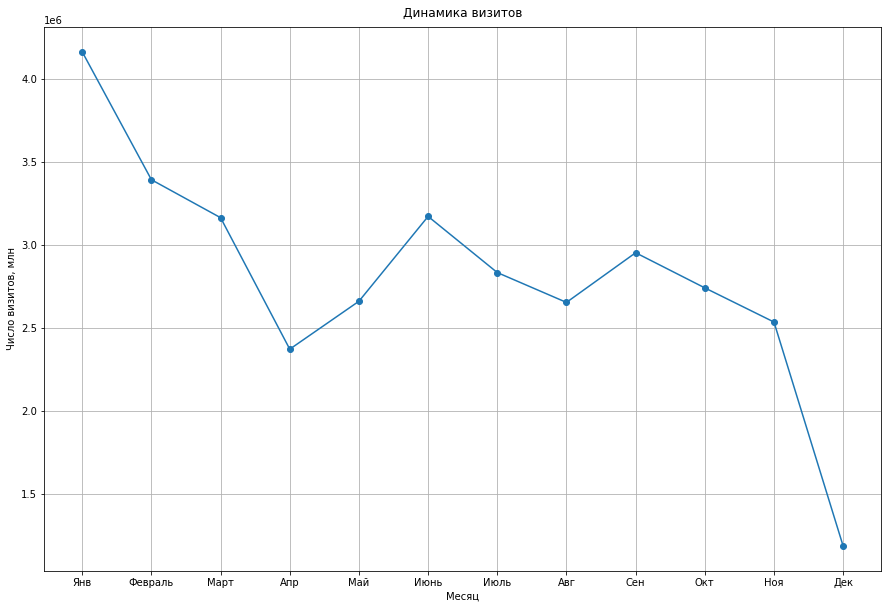

In [182]:
k = ['Янв','Февраль','Март','Апр','Май','Июнь','Июль','Авг','Сен','Окт','Ноя','Дек']
fig, axes = plt.subplots(1, 1)
axes.plot(k,predictions, 'o-')
axes.set_ylabel('Число визитов, млн')
axes.set_xlabel('Месяц')
axes.grid(True)
axes.set_title('Динамика визитов',
                loc = 'center',    
                pad = 10)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()